In [1]:
# If running in Google Colab, uncomment the following lines to install necessary packages
#!pip install warp-lang==1.7.0
#!pip install --upgrade git+https://github.com/psheehan/pinball-warp.git

In [1]:
from pinballrt.sources import Star
from pinballrt.grids import UniformCartesianGrid
from pinballrt.model import Model

import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np

In [2]:
star = Star()
star.set_blackbody_spectrum()

In [4]:
model = Model(grid=UniformCartesianGrid, grid_kwargs={"ncells":9, "dx":2.0*u.au})

density = np.ones(model.grid.shape)*1.0e-16 * u.g / u.cm**3
amax = np.ones(model.grid.shape) * u.cm
amax[4, 4, 4] = 1.0 * u.micron

model.add_density(density, "diana_wice.dst", amax=amax)
model.add_star(star)

/usr/local/python/3.12.1/lib/python3.12/site-packages/astropy/units/quantity.py:653: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/python/3.12.1/lib/python3.12/site-packages/astropy/units/quantity.py:653: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [5]:
model.thermal_mc(nphotons=1000000, device="cpu")

Iteration 0
Module pinballrt.sources f7a6df4 load on device 'cpu' took 343.61 ms  (cached)
Module pinballrt.grids ad28659 load on device 'cpu' took 23.59 ms  (cached)


100%|██████████| 1000000/1000000 [00:04<00:00, 241504.29it/s]


0
Iteration 1


100%|██████████| 1000000/1000000 [00:17<00:00, 58818.43it/s]


1
Iteration 2


100%|██████████| 1000000/1000000 [00:29<00:00, 34467.19it/s]


2 1.2392102 3.873857
Iteration 3


100%|██████████| 1000000/1000000 [00:32<00:00, 30568.83it/s]


3 1.0288286 1.2044866
Iteration 4


100%|██████████| 1000000/1000000 [00:25<00:00, 38659.37it/s]

4 1.0134372 1.0151874


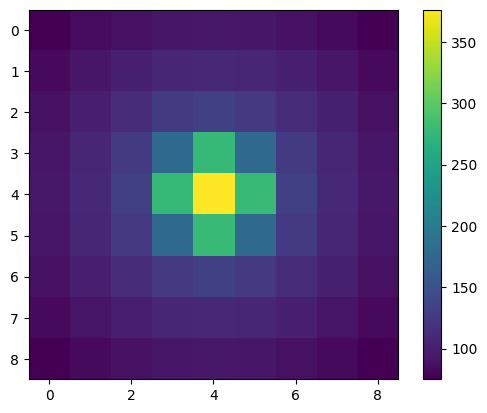

In [6]:
plt.imshow(model.grid_list["cpu"][0].grid.temperature.numpy()[:,:,4])
plt.colorbar()
plt.show()

In [7]:
image = model.make_image(npix=256, pixel_size=0.2*u.arcsec, lam=np.array([1., 1000.])*u.micron, incl=45.*u.degree, pa=45.*u.degree, distance=1.*u.pc, device='cpu')

100%|██████████| 100000/100000 [00:01<00:00, 78665.15it/s]


Time: 1.901526689529419


100%|██████████| 100000/100000 [00:00<00:00, 489467.30it/s]


Time: 0.8180091381072998
65536
Module pinballrt.camera 82113d2 load on device 'cpu' took 4.45 ms  (cached)


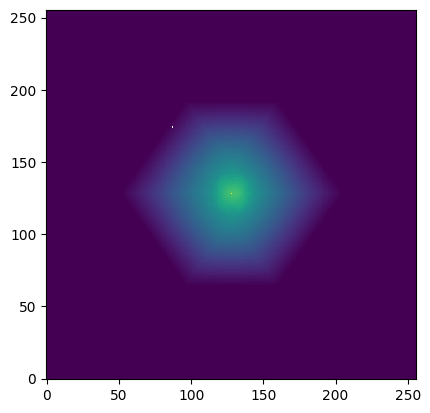

In [8]:
plt.imshow(image.intensity[:,:,1], origin="lower", interpolation="none")
plt.show()